# Stockage compatible S3 avec MinIO

In [1]:
import os
import io
from IPython.display import Image
from IPython.core.display import HTML

import s3fs
import boto3
import pandas as pd

## Architecture

In [2]:
Image(url="https://min.io/resources/img/products/encryption-worm.svg")

## Avantages

- **Portabilité**
- **Autonomie**
- **Découplage stockage / moteur de calcul**

## Démonstration

In [2]:
!mc ls s3

]11;?\mc: Configuration written to `/home/onyxia/.mc/config.json`. Please update your access credentials.
mc: Successfully created `/home/onyxia/.mc/share`.
mc: Initialized share uploads `/home/onyxia/.mc/share/uploads.json` file.
mc: Initialized share downloads `/home/onyxia/.mc/share/downloads.json` file.
[2022-02-10 16:51:27 UTC]     0B projet-relevanc/


In [6]:
!mc ls s3/projet-relevanc/inputs/raw

]11;?\[2023-04-21 12:25:31 UTC]  18MiB STANDARD casino.parquet
[2023-04-21 08:45:37 UTC] 475KiB STANDARD ciqual.parquet
[2023-04-21 08:11:06 UTC] 1.3GiB STANDARD fasttext.bin
[2023-04-21 12:10:50 UTC] 4.6MiB STANDARD franprix.parquet
[2023-04-21 12:11:57 UTC] 5.7MiB STANDARD monoprix.parquet
[2023-04-20 15:16:31 UTC]1000MiB STANDARD openfood.parquet
[2023-04-20 15:16:32 UTC] 748KiB STANDARD test.parquet
[2023-04-21 09:06:12 UTC]  44KiB STANDARD wikipedia.parquet


### Déclaration du endpoint

Les paramètres d'authentification auprès de MinIO sont injectés comme variables d'environnement dans les différents services du Datalab.

In [8]:
endpoint_url='https://' + os.environ['AWS_S3_ENDPOINT']
print(endpoint_url)

https://minio.lab.sspcloud.fr


In [9]:
print(os.environ['MC_HOST_s3'])

https://F0CYTHRSGJH45089RD6O:Kq1XLcvcvFp+OusPbcXSA2GkvrdQynFTXtR4ujf4:eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJGMENZVEhSU0dKSDQ1MDg5UkQ2TyIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSJdLCJhdXRoX3RpbWUiOjE2ODIzMjM3ODksImF6cCI6Im9ueXhpYSIsImVtYWlsIjoibGluby5nYWxpYW5hQGluc2VlLmZyIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImV4cCI6MTY4MjQyMzM1OCwiZmFtaWx5X25hbWUiOiJHYWxpYW5hIiwiZ2l2ZW5fbmFtZSI6Ikxpbm8iLCJncm91cHMiOlsiY2FydGlmbGV0dGUiLCJmb3JtYXRpb24iLCJoYWNrYXRob24tbnR0cy0yMDIzIiwiaGFja2F0aG9uLXVuLTIwMjIiLCJtdXR1YWxpc2F0aW9uLWNvZGlmaWNhdGlvbiIsInJlbGV2YW5jIiwic2Vsb2dlciIsInNzcGxhYiIsInV0aWxpdHIiXSwiaWF0IjoxNjgyMzIzNzkwLCJpc3MiOiJodHRwczovL2F1dGgubGFiLnNzcGNsb3VkLmZyL2F1dGgvcmVhbG1zL3NzcGNsb3VkIiwianRpIjoiYTc0ZTE4YzgtYTgwMy00NGRmLTk0YmItMWU0YTg1MjE4MzZjIiwibG9jYWxlIjoiZW4iLCJuYW1lIjoiTGlubyBHYWxpYW5hIiwibm9uY2UiOiI3ZGYxODZmNS0wNWM4LTQxNzktYThkNi1lOWFjNDgxZjU5MDMiLCJwb2xpY3kiOiJzdHNvbmx5IiwicHJlZmVycmVkX3VzZXJuYW1lIjoibGdhbGlhbmEiLCJzY29wZSI6Im9wZW5pZCBwcm9ma

### Importer les données en Python

#### Via un service

In [14]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': endpoint_url})

with fs.open('projet-relevanc/inputs/raw/ciqual.parquet','rb') as file:
    data = pd.read_parquet(file)

data.head(2)

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_sci,"Energie, Règlement UE N° 1169/2011 (kJ/100 g)",...,Vitamine K1 (µg/100 g),Vitamine K2 (µg/100 g),Vitamine C (mg/100 g),Vitamine B1 ou Thiamine (mg/100 g),Vitamine B2 ou Riboflavine (mg/100 g),Vitamine B3 ou PP ou Niacine (mg/100 g),Vitamine B5 ou Acide pantothénique (mg/100 g),Vitamine B6 (mg/100 g),Vitamine B9 ou Folates totaux (µg/100 g),Vitamine B12 (µg/100 g)
0,0,0,0,None,None,None,24999,Dessert (aliment moyen),None,NaN,...,NaN,NaN,1.37,0.084,0.150,0.61,0.4,0.056,30.8,0.21
1,1,101,0,entrées et plats composés,salades composées et crudités,None,25601,"Salade de thon et légumes, appertisée",None,NaN,...,NaN,NaN,2.75,0.000,0.053,4.45,0.0,0.290,31.0,1.45


#### Via une URL publique

In [17]:
!pip install geopandas

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


<Axes: >

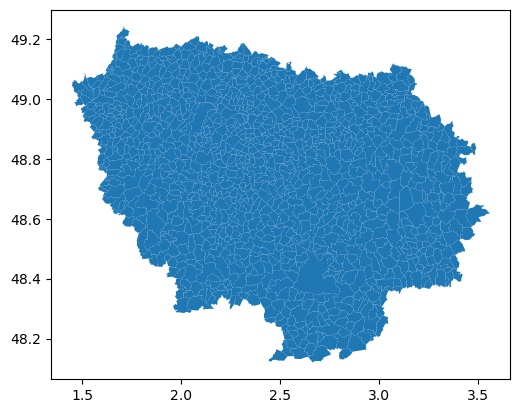

In [19]:
import geopandas as gpd
URL = "https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/REGION=11/vectorfile_format='geojson'/provider='IGN'/source='EXPRESS-COG-CARTO-TERRITOIRE'/raw.geojson"
data2 = gpd.read_file(URL)
data2.plot()

### Quand les données deviennent massives...

#### Le crash

In [23]:
with fs.open('projet-formation/diffusion/bonnes-pratiques-r/rp_2016_individu_sample.csv','r') as file:
     data = pd.read_csv(file, sep=";")

#### L'API S3 Select

In [38]:
s3 = boto3.client('s3', endpoint_url=endpoint_url)

QUERY = """
SELECT *
FROM s3object s 
WHERE s.region='52'
"""

resp = s3.select_object_content(
    Bucket='projet-formation',
    Key='diffusion/bonnes-pratiques-r/rp_2016_individu_sample.csv',
    ExpressionType='SQL',
    Expression=QUERY,
    InputSerialization = {'CSV': {"FileHeaderInfo": "USE", 
                                  'FieldDelimiter': ';'}},
    OutputSerialization = {'CSV': {}},
)

In [39]:
records = []
for event in resp['Payload']:
    if 'Records' in event:
        records.append(event['Records']['Payload'])
        
file_str = ''.join(r.decode('utf-8') for r in records)
data3 = pd.read_csv(io.StringIO(file_str), header=None)
data3.columns = ['region', 'nummr', 'achlr', 'aemm', 'aemmr', 'aged', 'ager20', 'agerev',
       'agerevq', 'anai', 'anarr', 'anem', 'anemr', 'apaf', 'arrivr', 'ascen',
       'bain', 'bati', 'catl', 'catpc', 'chau', 'chfl', 'chos', 'clim', 'cmbl',
       'couple', 'cs1', 'cs2', 'cs3', 'cuis', 'dept', 'derou', 'dipl_15',
       'eau', 'egoul', 'elec', 'empl', 'epci', 'etud', 'garl', 'hlml',
       'iletud', 'iletuu', 'ilt', 'iltuu', 'immi', 'inai', 'inat', 'infam',
       'inper', 'inperf', 'ipondi', 'iran', 'iranuu', 'lienf', 'lprf', 'lprm',
       'metrodom', 'moco', 'modv', 'na38', 'na88', 'naf08', 'naidt', 'nat13',
       'nat49', 'natc', 'natn12', 'natn49', 'natnc', 'nbpi', 'nperr', 'numf',
       'oridt', 'pnai12', 'prof', 'rech', 'sani', 'sanidom', 'sexe', 'sfm',
       'stat', 'stat_conj', 'stocd', 'surf', 'tact', 'tactd16', 'tp', 'trans',
       'typc', 'typfc', 'typl', 'typmd', 'typmr', 'ur', 'voit', 'wc']

In [40]:
data3.head(5)

,region,nummr,achlr,aemm,aemmr,aged,ager20,agerev,agerevq,anai,...,tp,trans,typc,typfc,typl,typmd,typmr,ur,voit,wc
0,52,263477,5,2000,9,19,19,18,15,1998,...,1,4,1,2,1,303,41,1,2,Z
1,52,184369,5,2002,9,14,14,13,10,2004,...,Z,Z,1,2,1,302,41,1,2,Z
2,52,28358,1,1998,8,54,54,53,50,1964,...,1,4,1,2,1,301,41,1,3,Z
3,52,425077,5,2014,9,20,19,19,15,1995,...,Z,Z,3,2,2,500,44,1,0,Z
4,52,91365,3,1996,8,62,64,61,60,1953,...,Z,Z,2,2,1,500,44,1,2,Z


In [132]:
data3.shape

(1415, 5)

#### Les moteurs de calcul distribué

- Spark
- Trino